In [29]:
import pandas as pd
import numpy as np

In [30]:
data= pd.read_csv(r"C:\final\synthetic_hospital_readmissions_data.csv")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


In [33]:
data.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,51.115100,49.744800,15.025000,2.002900,1.996800,2.001400,4.991400
std,2886.89568,19.552286,28.492038,8.391127,1.420033,1.411449,1.414142,2.591871
min,1.00000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2500.75000,34.000000,25.000000,8.000000,1.000000,1.000000,1.000000,3.000000
50%,5000.50000,51.000000,50.000000,15.000000,2.000000,2.000000,2.000000,5.000000
75%,7500.25000,68.000000,74.000000,22.000000,3.000000,3.000000,3.000000,7.000000
max,10000.00000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [34]:




# Check the number of rows before removing nulls
rows_before = data.shape[0]
print(f"Number of rows before removing null values: {rows_before}")

# Remove rows with any null values
data_c = data.dropna()

# Check the number of rows after removing nulls
rows_after = data_c.shape[0]
print(f"Number of rows after removing null values: {rows_after}")

# Optionally, you can also reset the index after dropping rows
data_c.reset_index(drop=True, inplace=True)


Number of rows before removing null values: 10000
Number of rows after removing null values: 5966


In [35]:
data_c.shape

(5966, 13)

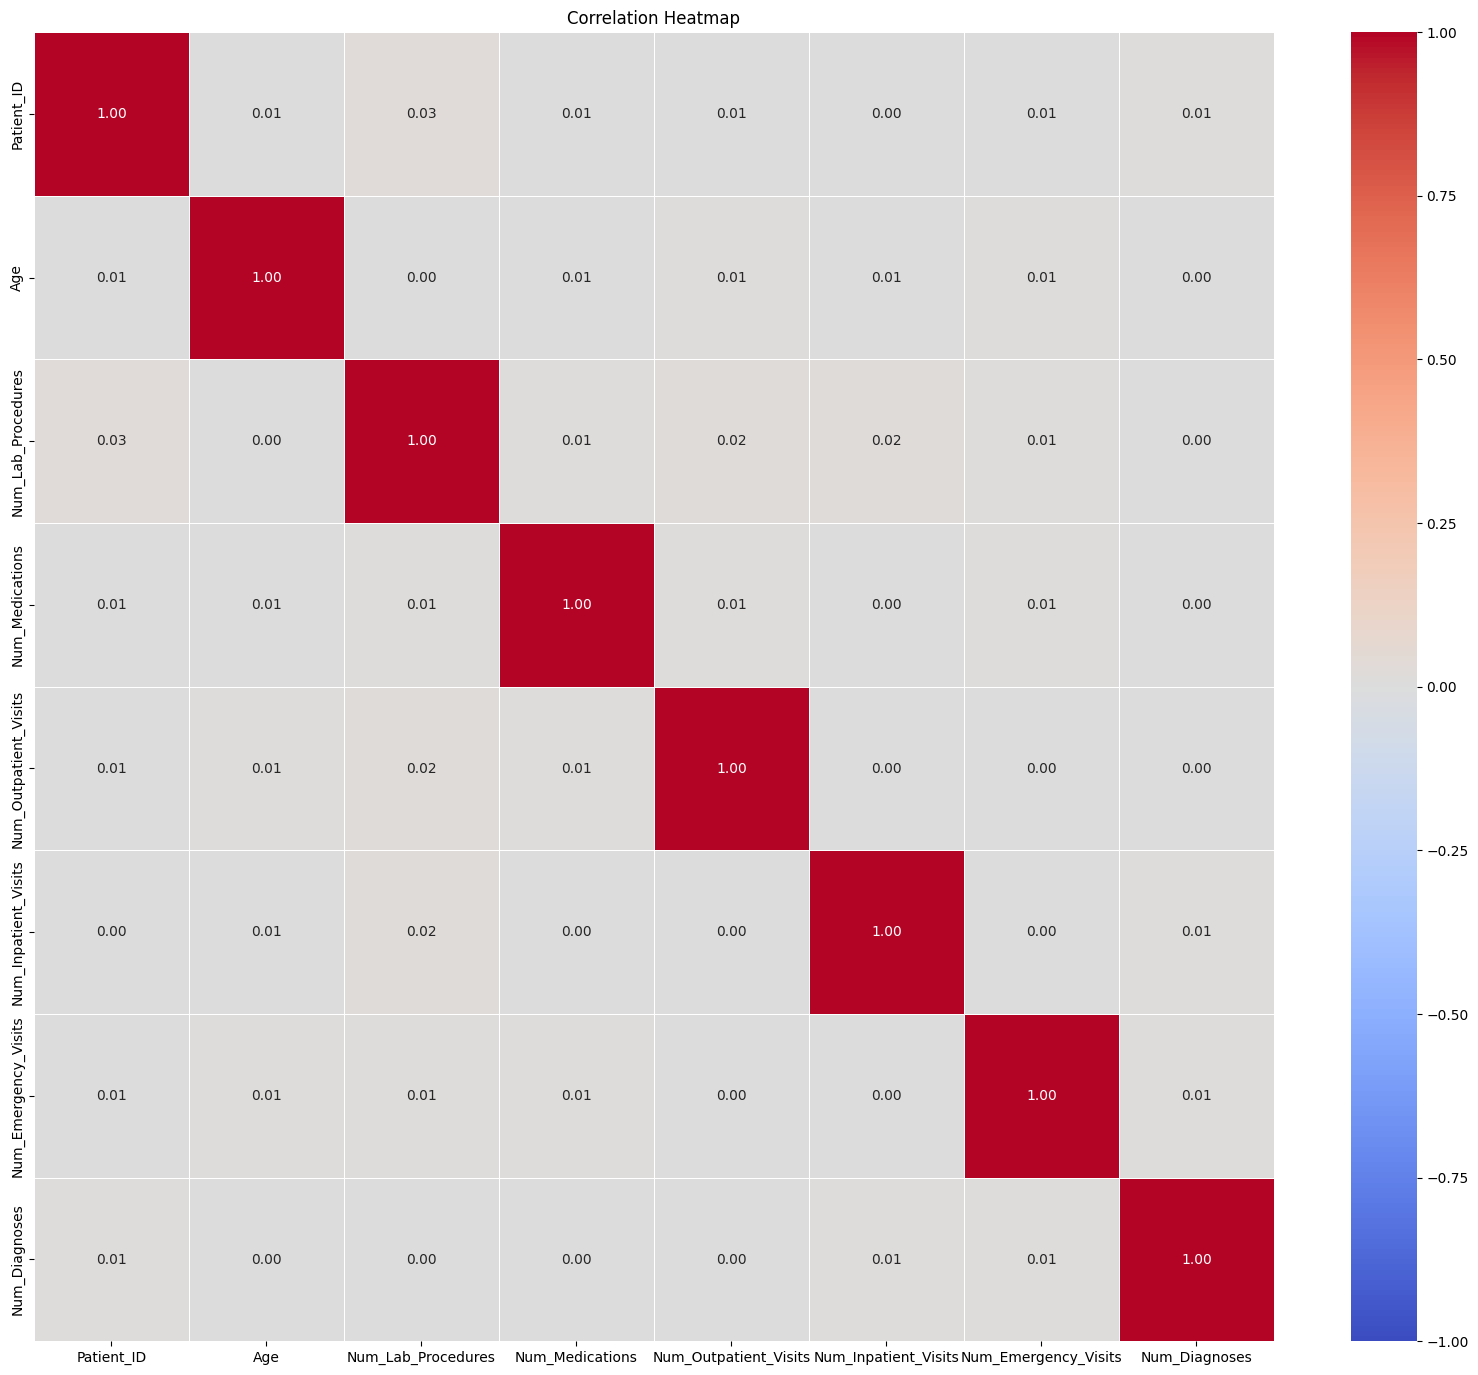

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
#data = pd.read_csv(r"C:\final\synthetic_hospital_readmissions_data.csv")

# Select numerical features for scaling
numerical_features = ["Age", "Num_Lab_Procedures", "Num_Medications"]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_c[numerical_features])

# Replace the original numerical features with the scaled ones
data_c[numerical_features] = scaled_data

C:\Users\reach\AppData\Local\Temp\ipykernel_14464\1836035698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[numerical_features] = scaled_data


In [37]:
data_c

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,0.924397,Female,Urgent,Diabetes,-0.511911,-0.123040,2,1,4,5,Normal,No
1,3,1.386251,Female,Elective,Diabetes,-0.970389,-1.545169,4,3,3,5,Abnormal,Yes
2,4,-0.666435,Female,Urgent,Infection,-0.970389,-0.597083,2,2,3,9,Normal,Yes
3,5,-0.512483,Male,Emergency,Heart Disease,-1.640471,-1.071126,4,3,1,2,Abnormal,No
4,6,-1.590144,Male,Emergency,Diabetes,-0.123968,0.943557,0,2,4,3,Normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,9995,0.975714,Female,Urgent,Heart Disease,-1.605204,-0.241551,4,3,0,4,Normal,Yes
5962,9996,0.513860,Other,Urgent,Injury,-0.617713,-0.952615,3,2,2,1,Normal,No
5963,9997,-0.307215,Male,Urgent,Heart Disease,-0.758783,-0.715594,3,3,0,2,Abnormal,No
5964,9998,-1.641461,Male,Elective,Injury,0.228707,0.825046,3,1,1,1,Normal,No


In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
#data = pd.read_csv(r"c:\final\synthetic_hospital_readmissions_data.csv")

# Identify categorical columns
categorical_columns = ["Gender", "Admission_Type", "Diagnosis", "A1C_Result"]

# One-hot encoding for nominal variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ensure dense output
one_hot_encoded = one_hot_encoder.fit_transform(data_c[categorical_columns])

# Print the shape of the encoded data for debugging
print("Shape of one-hot encoded data:", one_hot_encoded.shape)

# Check the feature names generated by the encoder
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_columns)

# Check that the number of encoded columns matches the number of features
print("Number of encoded columns:", len(encoded_feature_names))

# Ensure there are no mismatches between the encoded data shape and the number of feature names
if one_hot_encoded.shape[1] != len(encoded_feature_names):
    raise ValueError("Mismatch between the number of encoded columns and the feature names.")

# Convert encoded data to a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Drop original categorical columns and concatenate the encoded columns
data = pd.concat([data_c.drop(categorical_columns, axis=1), one_hot_encoded_df], axis=1)

# Print first few rows of the updated dataset
print("\nFirst few rows of the updated dataset:\n", data_c.head())


Shape of one-hot encoded data: (5966, 12)
Number of encoded columns: 12

First few rows of the updated dataset:
    Patient_ID       Age  Gender Admission_Type      Diagnosis  \
0           1  0.924397  Female         Urgent       Diabetes   
1           3  1.386251  Female       Elective       Diabetes   
2           4 -0.666435  Female         Urgent      Infection   
3           5 -0.512483    Male      Emergency  Heart Disease   
4           6 -1.590144    Male      Emergency       Diabetes   

   Num_Lab_Procedures  Num_Medications  Num_Outpatient_Visits  \
0           -0.511911        -0.123040                      2   
1           -0.970389        -1.545169                      4   
2           -0.970389        -0.597083                      2   
3           -1.640471        -1.071126                      4   
4           -0.123968         0.943557                      0   

   Num_Inpatient_Visits  Num_Emergency_Visits  Num_Diagnoses A1C_Result  \
0                     1       

In [39]:
data_c.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,0.924397,Female,Urgent,Diabetes,-0.511911,-0.123040,2,1,4,5,Normal,No
1,3,1.386251,Female,Elective,Diabetes,-0.970389,-1.545169,4,3,3,5,Abnormal,Yes
2,4,-0.666435,Female,Urgent,Infection,-0.970389,-0.597083,2,2,3,9,Normal,Yes
3,5,-0.512483,Male,Emergency,Heart Disease,-1.640471,-1.071126,4,3,1,2,Abnormal,No
4,6,-1.590144,Male,Emergency,Diabetes,-0.123968,0.943557,0,2,4,3,Normal,No


In [40]:
import pandas as pd

# Load your dataset (assuming 'data' is already loaded)
# data = pd.read_csv("path_to_your_dataset.csv")

# Check for missing values in the 'Readmitted' column
missing_count = data['Readmitted'].isnull().sum()
print(f"Number of missing values in 'Readmitted': {missing_count}")

# Option 1: Remove rows with missing 'Readmitted' values
data = data.dropna(subset=['Readmitted'])

# Option 2: Impute missing values (if applicable)
# For example, you could fill missing values with a mode or a default value:
# data['Readmitted'] = data['Readmitted'].fillna('No')  # Assuming 'No' is a reasonable default

# Check the unique values again
print("Unique values in 'Readmitted' column after handling missing values:", data['Readmitted'].unique())

# Convert 'Readmitted' to binary values if there are valid entries
if not data['Readmitted'].isnull().all():  # Check if there are still valid entries
    data['Readmitted'] = data['Readmitted'].map({'Yes': 1, 'No': 0})

# Check the value counts after conversion
print("Value counts for the 'Readmitted' column after conversion:\n", data['Readmitted'].value_counts())


Number of missing values in 'Readmitted': 0
Unique values in 'Readmitted' column after handling missing values: ['No' 'Yes']
Value counts for the 'Readmitted' column after conversion:
 Readmitted
0    2993
1    2973
Name: count, dtype: int64


In [41]:
import numpy as np
import pandas as pd

# Load your dataset (assuming 'data' is already loaded)
# data = pd.read_csv("path_to_your_dataset.csv")

# Select only numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for rows that are not outliers
mask = ~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)

# Store the cleaned data in the original DataFrame
cleaned_data = data[mask]

# If you want to overwrite the original data variable with the cleaned data:
data = cleaned_data

print("Data after removing outliers:\n", data)
data.to_csv(r"C:\final\cleaned_dataset.csv", index=False)

Data after removing outliers:
       Patient_ID       Age  Num_Lab_Procedures  Num_Medications  \
0              1  0.924397           -0.511911        -0.123040   
1              3  1.386251           -0.970389        -1.545169   
2              4 -0.666435           -0.970389        -0.597083   
4              6 -1.590144           -0.123968         0.943557   
6             11  0.205957           -0.194503         1.417600   
...          ...       ...                 ...              ...   
5951        9977 -0.974338            1.004592         1.180579   
5954        9983 -0.153263           -0.159236        -0.360061   
5955        9987 -1.230924           -0.194503         1.654622   
5956        9988 -0.255898           -0.758783         1.536111   
5957        9990  1.437568           -0.265038         1.299090   

      Num_Outpatient_Visits  Num_Inpatient_Visits  Num_Emergency_Visits  \
0                         2                     1                     4   
1             

In [44]:
data_c= data.reset_index(drop=True)

# Now, the DataFrame will have no index column
print(data.head())
# Export DataFrame to CSV without saving the index column
data_c.to_csv(r"C:\final\cleaned_dataset.csv", index=False)


   Patient_ID       Age  Num_Lab_Procedures  Num_Medications  \
0           1  0.924397           -0.511911        -0.123040   
1           3  1.386251           -0.970389        -1.545169   
2           4 -0.666435           -0.970389        -0.597083   
4           6 -1.590144           -0.123968         0.943557   
6          11  0.205957           -0.194503         1.417600   

   Num_Outpatient_Visits  Num_Inpatient_Visits  Num_Emergency_Visits  \
0                      2                     1                     4   
1                      4                     3                     3   
2                      2                     2                     3   
4                      0                     2                     4   
6                      0                     3                     2   

   Num_Diagnoses  Readmitted  Gender_Female  ...  Gender_Other  \
0              5           0            1.0  ...           0.0   
1              5           1            1.0  ...  

In [45]:
data_c.shape

(3031, 21)

                     Feature  Importance
0                 Patient_ID    0.156325
2         Num_Lab_Procedures    0.140751
1                        Age    0.138574
3            Num_Medications    0.121324
7              Num_Diagnoses    0.086271
5       Num_Inpatient_Visits    0.063922
4      Num_Outpatient_Visits    0.062331
6       Num_Emergency_Visits    0.060642
12  Admission_Type_Emergency    0.018002
18       A1C_Result_Abnormal    0.017624
13     Admission_Type_Urgent    0.017531
11   Admission_Type_Elective    0.017415
8              Gender_Female    0.017183
19         A1C_Result_Normal    0.016746
10              Gender_Other    0.016643


C:\Users\reach\AppData\Local\Temp\ipykernel_14464\120485895.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


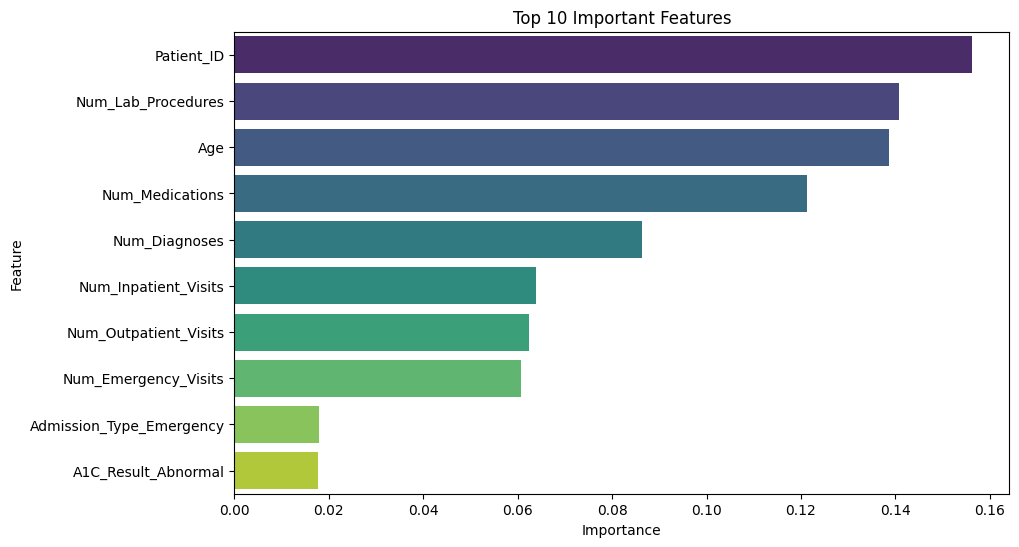

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data' is your cleaned DataFrame and 'Readmitted' is the target column

# Define features and target
X = data_c.drop(columns=['Readmitted'])  # Drop the target column
y = data_c['Readmitted']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(15))

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.show()


logisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Step 1: Check class distribution
print("Original class distribution:")
print(data_c['Readmitted'].value_counts())

# Step 2: Separate majority and minority classes
df_majority = data_c[data_c['Readmitted'] == 0]
df_minority =data_c[data_c['Readmitted'] == 1]

# Step 3: Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                     # sample without replacement
                                    n_samples=len(df_minority),  # match minority class
                                    random_state=42)  # reproducibility

# Step 4: Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Step 5: Split dataset into features and target variable
# Assuming df_undersampled is your DataFrame
X_undersampled = df_undersampled.drop('Readmitted',  axis=1)

# Display the first few rows of the new DataFrame to confirm the changes


y_undersampled = df_undersampled['Readmitted']

# Step 6: Train-test split
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_scaled_undersampled = scaler.transform(X_test_undersampled)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=3000, random_state=42)

# Train the model
logistic_model.fit(X_train_scaled_undersampled, y_train_undersampled)

# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled_undersampled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_undersampled, y_pred)
precision = precision_score(y_test_undersampled, y_pred)
recall = recall_score(y_test_undersampled, y_pred)
f1 = f1_score(y_test_undersampled, y_pred)
roc_auc = roc_auc_score(y_test_undersampled, y_pred)

# Display the evaluation metrics
results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

results

Original class distribution:
Readmitted
1    1534
0    1497
Name: count, dtype: int64


{'Accuracy': 0.4744842562432139,
 'Precision': 0.4665461121157324,
 'Recall': 0.5771812080536913,
 'F1-Score': 0.516,
 'ROC-AUC': 0.4774091694276896}

decisiontree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Step 1: Check class distribution
print("Original class distribution:")
print(data_c['Readmitted'].value_counts())

# Step 2: Separate majority and minority classes
df_majority = data_c[data_c['Readmitted'] == 0]
df_minority =data_c[data_c['Readmitted'] == 1]

# Step 3: Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                     # sample without replacement
                                    n_samples=len(df_minority),  # match minority class
                                    random_state=42)  # reproducibility

# Step 4: Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Step 5: Split dataset into features and target variable
# Assuming df_undersampled is your DataFrame
X_undersampled = df_undersampled.drop('Readmitted',  axis=1)

# Display the first few rows of the new DataFrame to confirm the changes


y_undersampled = df_undersampled['Readmitted']

# Step 6: Train-test split
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_scaled_undersampled = scaler.transform(X_test_undersampled)


# Step 8: Train Decision Tree model on undersampled data
dt_model_undersampled = DecisionTreeClassifier(random_state=42)
dt_model_undersampled.fit(X_train_scaled_undersampled, y_train_undersampled)

# Step 9: Evaluate the model on the test set
y_pred_dt_undersampled = dt_model_undersampled.predict(X_test_scaled_undersampled)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test_undersampled, y_pred_dt_undersampled)
precision_dt = precision_score(y_test_undersampled, y_pred_dt_undersampled)
recall_dt = recall_score(y_test_undersampled, y_pred_dt_undersampled)
f1_dt = f1_score(y_test_undersampled, y_pred_dt_undersampled)
roc_auc_dt = roc_auc_score(y_test_undersampled, dt_model_undersampled.predict_proba(X_test_scaled_undersampled)[:, 1])

# Print the evaluation metrics for Decision Tree
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - Precision: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")
print(f"Decision Tree - F1-Score: {f1_dt:.4f}")
print(f"Decision Tree - ROC-AUC: {roc_auc_dt:.4f}")


Original class distribution:
Readmitted
1    1534
0    1497
Name: count, dtype: int64
Decision Tree - Accuracy: 0.6471
Decision Tree - Precision: 0.6631
Decision Tree - Recall: 0.5548
Decision Tree - F1-Score: 0.6041
Decision Tree - ROC-AUC: 0.6445


random

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your dataset
data_c = pd.read_csv(r"C:\final\cleaned_dataset.csv")

# Step 1: Check class distribution
print("Original class distribution:")
print(data_c['Readmitted'].value_counts())

# Step 2: Separate majority and minority classes
df_majority = data_c[data_c['Readmitted'] == 0]
df_minority = data_c[data_c['Readmitted'] == 1]

# Step 3: Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                     n_samples=len(df_minority),  # match minority class
                                     random_state=42)  # reproducibility

# Step 4: Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Step 5: Split dataset into features and target variable
X_undersampled = df_undersampled.drop('Readmitted', axis=1)
y_undersampled = df_undersampled['Readmitted']

# Step 6: Train-test split
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)
# Step 7: Feature scaling (only for numerical features)
numeric_features = X_train_undersampled.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_train_scaled_undersampled = X_train_undersampled.copy()
X_test_scaled_undersampled = X_test_undersampled.copy()

# Scale only the numerical features
X_train_scaled_undersampled[numeric_features] = scaler.fit_transform(X_train_undersampled[numeric_features])
X_test_scaled_undersampled[numeric_features] = scaler.transform(X_test_undersampled[numeric_features])

# Step 8: Hyperparameter tuning for Random Forest model
model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [600],  # Different numbers of trees
    'max_depth': [15],  # Control tree depth
    
    'min_samples_split': [15],  # Minimum samples required to split an internal node
    'min_samples_leaf': [2],  # Minimum samples required to be at a leaf node
    'n_jobs': [-1]  
}
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled_undersampled, y_train_undersampled)

# Best parameters from grid search
print("Best parameters from grid search:")
print(grid_search.best_params_)

# Step 9: Train the Random Forest model using the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled_undersampled, y_train_undersampled)

# Step 10: Evaluate the model on the test set
y_pred_rf_undersampled = best_rf_model.predict(X_test_scaled_undersampled)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_undersampled, y_pred_rf_undersampled)
precision_rf = precision_score(y_test_undersampled, y_pred_rf_undersampled)
recall_rf = recall_score(y_test_undersampled, y_pred_rf_undersampled)
f1_rf = f1_score(y_test_undersampled, y_pred_rf_undersampled)
roc_auc_rf = roc_auc_score(y_test_undersampled, best_rf_model.predict_proba(X_test_scaled_undersampled)[:, 1])

# Print the evaluation metrics for Random Forest
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-Score: {f1_rf:.4f}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf:.4f}")


Original class distribution:
Readmitted
1    1534
0    1497
Name: count, dtype: int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from grid search:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 600, 'n_jobs': -1}
Random Forest - Accuracy: 0.6819
Random Forest - Precision: 0.6559
Random Forest - Recall: 0.7248
Random Forest - F1-Score: 0.6886
Random Forest - ROC-AUC: 0.7197


xgb

In [25]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your dataset
data_c = pd.read_csv(r"C:\final\cleaned_dataset.csv")

# Step 1: Check class distribution
print("Original class distribution:")
print(data_c['Readmitted'].value_counts())

# Step 2: Separate majority and minority classes
df_majority = data_c[data_c['Readmitted'] == 0]
df_minority = data_c[data_c['Readmitted'] == 1]

# Step 3: Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                     n_samples=len(df_minority),  # match minority class
                                     random_state=42)  # reproducibility

# Step 4: Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Step 5: Split dataset into features and target variable
X_undersampled = df_undersampled.drop('Readmitted', axis=1)
y_undersampled = df_undersampled['Readmitted']

# Step 6: Train-test split
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Step 7: Feature scaling (only for numerical features)
numeric_features = X_train_undersampled.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_train_scaled_undersampled = X_train_undersampled.copy()
X_test_scaled_undersampled = X_test_undersampled.copy()

# Scale only the numerical features
X_train_scaled_undersampled[numeric_features] = scaler.fit_transform(X_train_undersampled[numeric_features])
X_test_scaled_undersampled[numeric_features] = scaler.transform(X_test_undersampled[numeric_features])

# Step 8: Hyperparameter tuning for XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
# Define the parameter grid
xgb_params = {
    'objective': ['binary:logistic'],  # Wrap the single value in a list
    'learning_rate': [0.01, 0.05, 0.1],  # Example of a range of values
    'max_depth': [3, 6, 9,15],  # Example of different depths to try
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 1, 5],
    'reg_alpha': [0.0, 0.1],
    'reg_lambda': [1.0, 5.0],
    'n_estimators': [500],
    'scale_pos_weight': [1, (len(df_majority) / len(df_minority))]  # Adjust for class imbalance
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled_undersampled, y_train_undersampled)

# Best parameters from grid search
print("Best parameters from grid search:")
print(grid_search.best_params_)

# Step 9: Train the XGBoost model using the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled_undersampled, y_train_undersampled)

# Step 10: Evaluate the model on the test set
y_pred_xgb_undersampled = best_xgb_model.predict(X_test_scaled_undersampled)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test_undersampled, y_pred_xgb_undersampled)
precision_xgb = precision_score(y_test_undersampled, y_pred_xgb_undersampled)
recall_xgb = recall_score(y_test_undersampled, y_pred_xgb_undersampled)
f1_xgb = f1_score(y_test_undersampled, y_pred_xgb_undersampled)
roc_auc_xgb = roc_auc_score(y_test_undersampled, best_xgb_model.predict_proba(X_test_scaled_undersampled)[:, 1])

# Print the evaluation metrics for XGBoost
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1-Score: {f1_xgb:.4f}")
print(f"XGBoost - ROC-AUC: {roc_auc_xgb:.4f}")
#accuracy0.66

Original class distribution:
Readmitted
1    1534
0    1497
Name: count, dtype: int64
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best parameters from grid search:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500, 'objective': 'binary:logistic', 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'scale_pos_weight': 0.9758800521512386, 'subsample': 0.6}
XGBoost - Accuracy: 0.6645
XGBoost - Precision: 0.6554
XGBoost - Recall: 0.6510
XGBoost - F1-Score: 0.6532
XGBoost - ROC-AUC: 0.7472


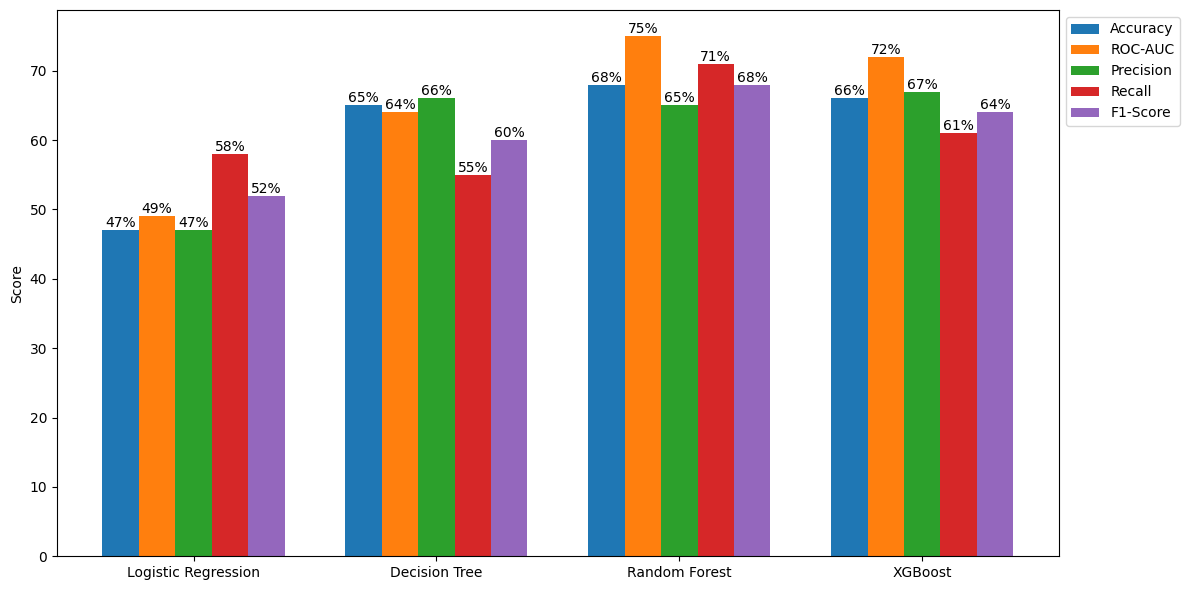

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score

# Define a list of models to evaluate
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42)
]

# Define a list of model names for display purposes
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

# Create empty lists to store the evaluation metrics for each model
accuracies, roc_aucs, precisions, recalls, f1s = [], [], [], [], []

# Loop through each model to evaluate its performance
for _model in models:
    # Train the model
    _model.fit(X_train_scaled_undersampled, y_train_undersampled)
    
    # Make probability predictions on the test data using the current model
    preds_proba = _model.predict_proba(X_test_scaled_undersampled)[:, 1]
    
    # Make binary predictions based on a threshold of 0.5
    preds = (preds_proba > 0.5).astype(int)

    # Calculate precision, recall, F1-score, and accuracy
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test_undersampled, preds)
    acc = accuracy_score(y_test_undersampled, preds)

    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y_test_undersampled, preds_proba)
    
    # Extract the precision, recall, and F1-score for the positive class (class 1)
    target_precision = precision[1]
    target_recall = recall[1]
    target_f1 = f1_score[1]

    # Append the evaluation metrics for the current model to their respective lists
    accuracies.append(round(acc*100))
    roc_aucs.append(round(roc_auc*100))
    precisions.append(round(target_precision*100))
    recalls.append(round(target_recall*100))
    f1s.append(round(target_f1*100))

# Define a list of the evaluation metrics to display in the bar chart
metrics = ["Accuracy", "ROC-AUC", "Precision", "Recall", "F1-Score"]

# Create variables to set the position and width of each bar in the bar chart
x_pos = np.arange(len(model_names))
width = 0.15  # Adjusted width for better spacing

# Create a bar chart to display the evaluation metrics for each model
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x_pos - 2 * width, accuracies, width, label="Accuracy")
ax.bar(x_pos - width, roc_aucs, width, label="ROC-AUC")
ax.bar(x_pos, precisions, width, label="Precision")
ax.bar(x_pos + width, recalls, width, label="Recall")
ax.bar(x_pos + 2 * width, f1s, width, label="F1-Score")

# Set the x-tick labels to the model names and display them vertically
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)

# Set the y-label to "Score"
ax.set_ylabel("Score")

# Add a legend to the chart
ax.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Annotate each bar with its respective value
for i, v in enumerate(accuracies):
    ax.annotate(str(v) + "%", xy=(i - 2 * width, v), ha="center", va="bottom")
for i, v in enumerate(roc_aucs):
    ax.annotate(str(v) + "%", xy=(i - width, v), ha="center", va="bottom")
for i, v in enumerate(precisions):
    ax.annotate(str(v) + "%", xy=(i, v), ha="center", va="bottom")
for i, v in enumerate(recalls):
    ax.annotate(str(v) + "%", xy=(i + width, v), ha="center", va="bottom")
for i, v in enumerate(f1s):
    ax.annotate(str(v) + "%", xy=(i + 2 * width, v), ha="center", va="bottom")

plt.tight_layout()
plt.show()
